In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
# dependent and independent features

In [5]:
X=df.drop('FWI',axis=1)

In [6]:
Y=df['FWI']

In [7]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
# train-test split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [12]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [14]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


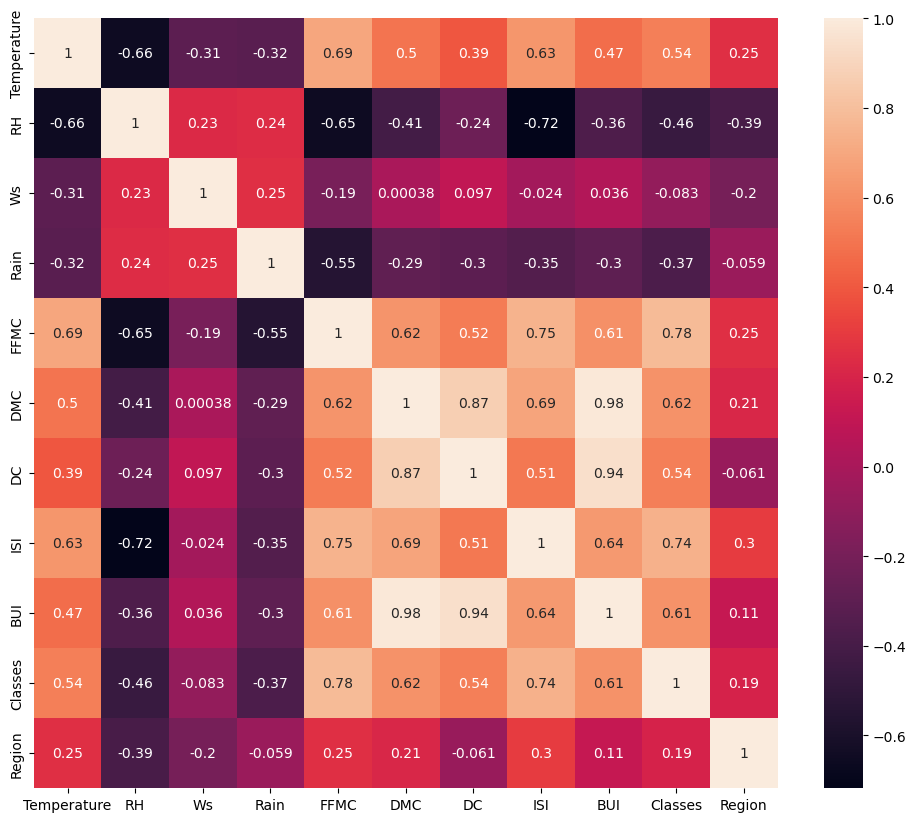

In [16]:
# multicolinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [17]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [18]:
# threshold_domain expertise
corr_features=correlation(X_train,0.85)

In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
# drop the features when correlation is higher than threshold
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [21]:
# feature scaling or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
scaler=StandardScaler()

In [24]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [26]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

# Box Plot for understanding effect of standard scaler

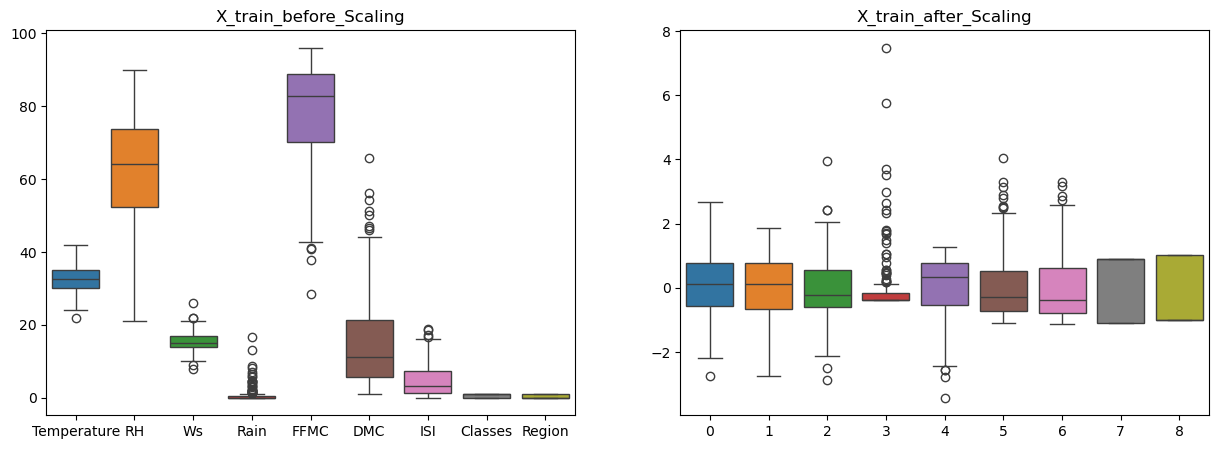

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train_before_Scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_after_Scaling')

plt.show()


# Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
linreg=LinearRegression()

In [44]:
linreg.fit(X_train_scaled,Y_train)

LinearRegression()

In [45]:
y_pred=linreg.predict(X_test_scaled)

In [47]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)

In [48]:
score=r2_score(Y_test,y_pred)

In [49]:
mae, mse, rmse, score

(0.5468236465249993,
 0.6742766873791594,
 np.float64(0.821143524226526),
 0.9847657384266951)

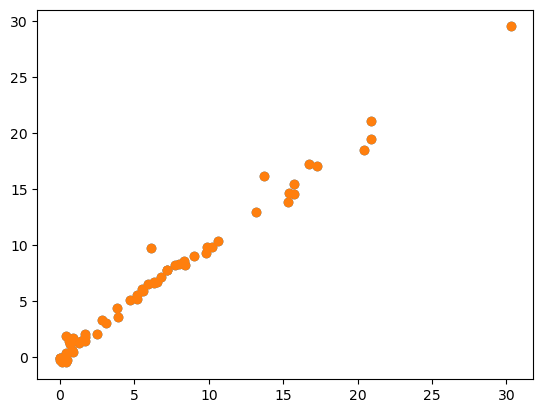

In [51]:
plt.scatter(Y_test, y_pred)
plt.show()

# Lasso Regression

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
lasso= Lasso()

In [55]:
lasso.fit(X_train_scaled,Y_train)

Lasso()

In [59]:
y_pred=lasso.predict(X_test_scaled)

In [60]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)

In [61]:
mae, mse, rmse, score

(1.1331759949144085,
 2.248345891897475,
 np.float64(1.4994485292591657),
 0.9492020263112388)

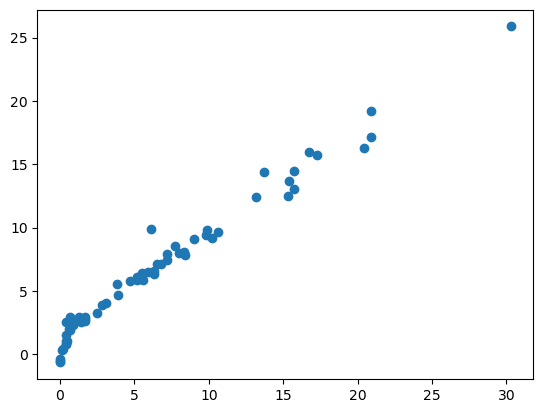

In [62]:
plt.scatter(Y_test, y_pred)
plt.show()


# cross Validation lasso

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
lassocv=LassoCV(cv=5)

In [67]:
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [69]:
y_pred=lassocv.predict(X_test_scaled)

In [70]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)

In [77]:
mae, mse, rmse, score

(0.6199701158263432,
 0.7924995554743627,
 np.float64(0.8902244410677358),
 0.9820946715928275)

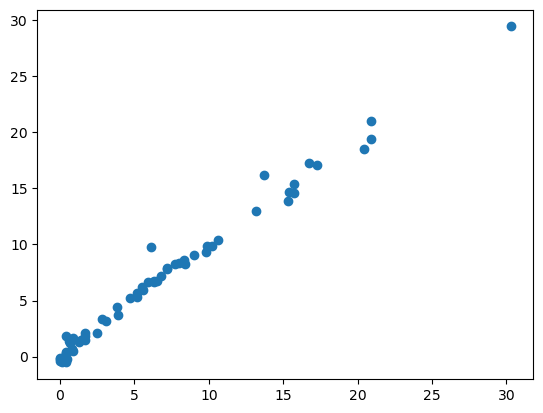

In [78]:
plt.scatter(Y_test, y_pred)
plt.show()

# Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
ridge=Ridge()


In [81]:
ridge.fit(X_train_scaled,Y_train)

Ridge()

In [82]:
y_pred=ridge.predict(X_test_scaled)

In [83]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)

In [84]:
mae, mse, rmse, score

(0.5642305340105717,
 0.6949198918152085,
 np.float64(0.8336185529456555),
 0.9842993364555513)

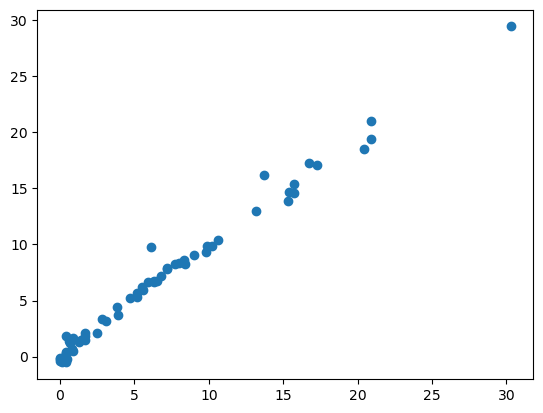

In [85]:
plt.scatter(Y_test, y_pred)
plt.show()

# Ridge Cross validation

In [88]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
ridgecv=RidgeCV(cv=5)

In [97]:
ridgecv.fit(X_train_scaled,Y_train)

RidgeCV(cv=5)

In [98]:
y_pred=ridgecv.predict(X_test_scaled)



0.9842993364555513


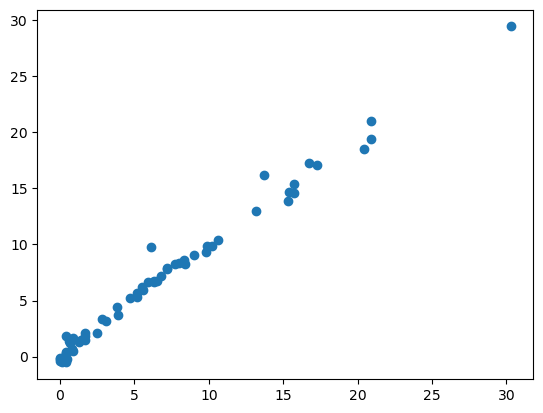

In [99]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)
plt.scatter(Y_test, y_pred)
print (score)
plt.show()

In [100]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic net Regression

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
elastic=ElasticNet()

In [104]:
elastic.fit(X_train_scaled,Y_train)

ElasticNet()

In [105]:
y_pred=elastic.predict(X_test_scaled)

R2 score: 0.8753460589519703
MSE: 5.517251101025224


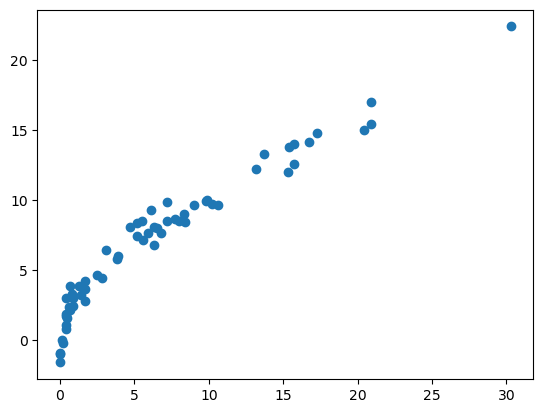

In [107]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)
plt.scatter(Y_test, y_pred)
print ("R2 score:",score)
print("MSE:",mse)
plt.show()

In [108]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# ElasticNet CV regression

In [109]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [112]:
elasticv=ElasticNetCV(cv=5)

In [113]:
elasticv.fit(X_train_scaled,Y_train)

ElasticNetCV(cv=5)

In [114]:
y_pred=elasticv.predict(X_test_scaled)

R2 score: 0.9814217587854941
MSE: 0.8222830416276268


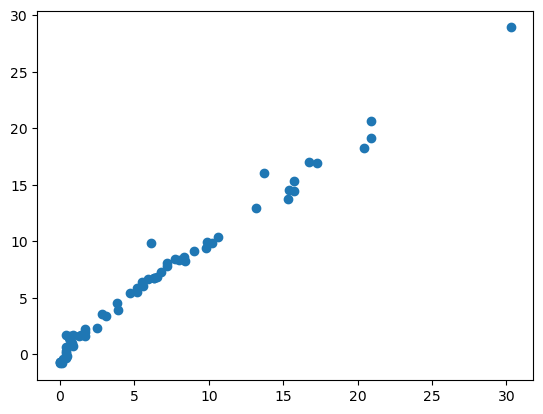

In [115]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,y_pred)
plt.scatter(Y_test, y_pred)
print ("R2 score:",score)
print("MSE:",mse)
plt.show()

In [116]:
# pickle the machine learning models, preprocessing model standardscaler

In [117]:
scaler

StandardScaler()

In [118]:
ridge

Ridge()

In [119]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
